In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


#modeling 

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [46]:

df=pd.read_csv('data/Stud.csv')

In [47]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [48]:
X= df.drop(columns=['math score'],axis=1)

In [49]:
y=df['math score']

In [50]:
#create column transformer with 3 tyoes of transformers


num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer (
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
        #remainder="passthrough",
    ])

In [51]:
X = preprocessor.fit_transform(X)

In [52]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape,X_test.shape

((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model Training

In [54]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted) 
    mse = mean_squared_error(true,predicted) 
    rmse= np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [58]:

 models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
     # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')




Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2409
- Mean Absolute Error: 4.1980
- R2 Score: 0.8814
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.7360
- Mean Absolute Error: 4.4841
- R2 Score: 0.8519


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4732
- Mean Absolute Error: 5.0840
- R2 Score: 0.8190
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.9366
- Mean Absolute Error: 5.5796
- R2 Score: 0.7834


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2362
- Mean Absolute Error: 4.1929
- R2 Score: 0.8816
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.7124
- Mean Absolute Error: 4.4630
- R2 Score: 0.8531


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6846
- Mean Absolute Error: 4.5500
- R2 Score: 0.8604
-----------------------

In [60]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.853140
0,Linear Regression,0.851927
7,CatBoosting Regressor,0.830806
5,Random Forest Regressor,0.814161
6,XGBRegressor,0.813056
8,AdaBoost Regressor,0.795386
1,Lasso,0.783450
3,K-Neighbors Regressor,0.732665
4,Decision Tree,0.687187


Linear Regression


In [61]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.19


Plot y_pred and y_test


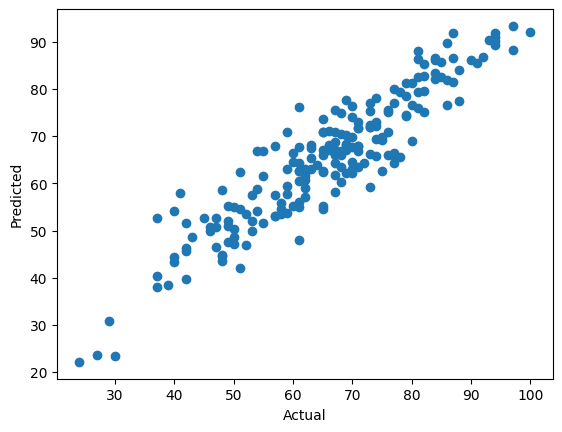

In [62]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math score'>

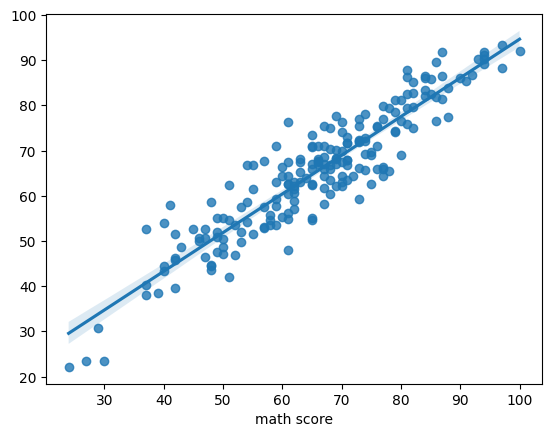

In [63]:
sns.regplot(x = y_test, 
            y = y_pred,)

Difference between Actual and Predicted Values


In [64]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
37,50,50.40625,-0.40625
726,65,70.93750,-5.93750
846,91,85.43750,5.56250
295,67,64.34375,2.65625
924,74,72.21875,1.78125
...,...,...,...
839,66,67.56250,-1.56250
810,51,42.00000,9.00000
930,67,70.96875,-3.96875
616,37,37.96875,-0.96875
